###### Import all libraries

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/DSX-Python35

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-2.2.2               |           py35_1         462 KB  conda-forge
    certifi-2018.8.24          |        py35_1001         139 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    ca-certificates-2019.3.9   |       hecc5488_0         146 KB  conda-forge
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    branca-0.3.1               |             py_0          25 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.0 MB

The following NEW packages will

##### Load data from excel - Residential Property Rates of Bangalore Multistorey Apartment for Jan-Mar 2019

In [44]:
# The code was removed by Watson Studio for sharing.

,Locality,Average Price(Rs./Sq-ft)
0,Vijayanagar,"5,686"
1,Whitefield,"5,866"
2,Yelahanka,"5,064"
3,Yelahanka Dodda Ballapur Road,"3,799"
4,Yelahanka New Town,"4,895"


##### get location data for all areas in Bangalore

In [45]:
df_data.size
df_data.tail()

,Locality,Average Price(Rs./Sq-ft)
223,Madivala,6000
224,Puttenahalli,3500
225,Vasanth Nagar,6163
226,Yediyur,1500
227,A Narayanapura,8490


In [46]:
def getlat_Long(names, price ):
    list =[]
    city = ", Bangalore"
    for name, price in zip(names, price):

        address = name + city
        geolocator = Nominatim(user_agent="ny_explorer")
        location = geolocator.geocode(address)
        if (location != None):
            latitude = location.latitude
            longitude = location.longitude
            list.append([name, price, latitude, longitude])
#            print (name)
#            print('The geograpical coordinate are {}, {}.'.format(latitude, longitude))
        else : 
            print('no data for' , name)
    df_data2= pd.DataFrame(list)
    df_data2.columns = ['Locality', 
                        'price',
                  'Latitude', 
                  'Longitude']
    print ('over')
    return (df_data2)

In [48]:
#df_data.insert(2, "Latitude", "NA") 
#df_data.insert(3,"Longitude","NA")
DF= getlat_Long(names=df_data['Locality'], 
                            price =df_data['Average Price(Rs./Sq-ft)'])

no data for Yelahanka Dodda Ballapur Road
no data for Basaveshvara Nagar
no data for Bhoganhalli
no data for Binnypete
no data for Brooke Field
no data for Akshayanagar
no data for Armane Nagar
no data for Babusahib Palya
no data for Devarachikannahalli
no data for Devasthanagalu
no data for Dollars Colony-RMV Extension Stage 2
no data for Hebbal Kempapura
no data for Hoodi Cirle
no data for Hosa Halli
no data for JP Nagar Phase 1
no data for JP Nagar Phase 5
no data for JP Nagar Phase 6
no data for JP Nagar Phase 7
no data for JP Nagar Phase 8
no data for Manyata Tech Park
no data for Marathahalli-Sarjapur Outer Ring Road
no data for New International Airport Road
no data for RMV Extension Stage 2
no data for Sarjapur-Attibele Road
no data for Seegehalli-K R Puram
no data for Yelahanka Dodda Ballapur Road
no data for Kottanur
no data for Rajarajeshwarinagar
no data for Vasanth pura
no data for Agrahara Daasarahalli
over


In [49]:
DF

,Locality,price,Latitude,Longitude
0,Vijayanagar,"5,686",12.971889,77.545789
1,Whitefield,"5,866",12.969637,77.749745
2,Yelahanka,"5,064",13.100698,77.596345
3,Yelahanka New Town,"4,895",13.097804,77.581189
4,Yemalur,"7,173",12.945464,77.680550
5,Yeshwanthpura,"8,025",13.025609,77.554107
6,Basavanagudi,"10,108",12.941726,77.575502
7,Begur,"4,668",12.863389,77.613011
8,Begur Road,"4,844",12.874601,77.625511
9,Bellandur,"6,443",12.979120,77.591300


In [50]:
#DF, df_data = [d.reset_index(drop=True) for d in (DF,df_data)]
#DF.index = df_data.index
#df_data.drop("Longitude", axis=1, inplace=True)
#df_data1=df_data.join(DF[['Latitude', 'Longitude']])
df_data1 = DF
df_data1.head()

,Locality,price,Latitude,Longitude
0,Vijayanagar,"5,686",12.971889,77.545789
1,Whitefield,"5,866",12.969637,77.749745
2,Yelahanka,"5,064",13.100698,77.596345
3,Yelahanka New Town,"4,895",13.097804,77.581189
4,Yemalur,"7,173",12.945464,77.680550


In [ ]:
#df_data2 = df_data1.dropna(subset=["Longitude"],axis=0, inplace=True)
#df_data.reset_index(drop=True, inplace=True)

In [51]:
# Now the dataframe contains all the locality in Bangalore with its price and co-ordinates
df_data.rename(columns={'Average Price(Rs./Sq-ft)':'Price'},inplace= True)
df_data1.rename(columns={'price':'Price'},inplace= True)
df_data

,Locality,Price
0,Vijayanagar,"5,686"
1,Whitefield,"5,866"
2,Yelahanka,"5,064"
3,Yelahanka Dodda Ballapur Road,"3,799"
4,Yelahanka New Town,"4,895"
5,Yemalur,"7,173"
6,Yeshwanthpura,"8,025"
7,Basavanagudi,"10,108"
8,Basaveshvara Nagar,"6,908"
9,Begur,"4,668"


In [52]:
df_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
Locality     198 non-null object
Price        198 non-null object
Latitude     198 non-null float64
Longitude    198 non-null float64
dtypes: float64(2), object(2)
memory usage: 6.3+ KB


In [53]:
df_data1['Price'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df_data['Price'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
df_data1['Price']=df_data1['Price'].astype(int)
df_data['Price']=df_data['Price'].astype(int)
df_data1['Locality']=df_data1['Locality'].astype(str)
df_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
Locality     198 non-null object
Price        198 non-null int64
Latitude     198 non-null float64
Longitude    198 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.3+ KB


In [54]:
df_data1.tail(20)

,Locality,Price,Latitude,Longitude
178,Basaveshwara Nagar,6970,12.993224,77.539158
179,Chandra Layout,3000,12.965293,77.518155
180,Chickpet,15000,12.968003,77.578642
181,Dasarahalli,4654,13.099485,77.836101
182,Ejipura,5972,12.945245,77.626914
183,Gandhinagar,12000,12.977153,77.578401
184,Hongasandra,3910,12.897536,77.628075
185,Hosahalli,5143,13.350099,77.742908
186,Hosakerehalli,4151,12.930188,77.537833
187,Jayamahal,10000,12.998812,77.597579


#### Now lets analyze the data and visualize it using data visualization methods

In [55]:
#### fix the errors in location co-ordinates for below areas 
#Bommanahalli
#Gottigere
#Mahadevapura
#Ambalipura
#Koramangala

df_data1.loc[df_data1['Locality'] == 'Koramangala', 'Latitude'] = 12.9352
df_data1.loc[df_data1['Locality'] == 'Koramangala', 'Longitude'] = 77.6244

df_data1.loc[df_data1['Locality'] == 'Bommanahalli', 'Latitude'] = 12.9030
df_data1.loc[df_data1['Locality'] == 'Bommanahalli', 'Longitude'] = 77.6242

df_data1.loc[df_data1['Locality'] == 'Ambalipura', 'Latitude'] = 12.9150
df_data1.loc[df_data1['Locality'] == 'Ambalipura', 'Longitude'] = 77.6701

df_data1.loc[df_data1['Locality'] == 'Gottigere', 'Latitude'] = 12.8564
df_data1.loc[df_data1['Locality'] == 'Gottigere', 'Longitude'] = 77.5888

df_data1.loc[df_data1['Locality'] == 'Mahadevapura', 'Latitude'] = 12.9880
df_data1.loc[df_data1['Locality'] == 'Mahadevapura', 'Longitude'] = 77.6895


In [56]:
df_data1.loc[df_data1['Locality'] == 'Cunningham Road', 'Locality'] = "Shivaji Nagar"
df_data1.loc[df_data1['Locality'] == 'Frazer Town', 'Locality'] = "Pulikeshi Nagar"
df_data1

,Locality,Price,Latitude,Longitude
0,Vijayanagar,5686,12.971889,77.545789
1,Whitefield,5866,12.969637,77.749745
2,Yelahanka,5064,13.100698,77.596345
3,Yelahanka New Town,4895,13.097804,77.581189
4,Yemalur,7173,12.945464,77.680550
5,Yeshwanthpura,8025,13.025609,77.554107
6,Basavanagudi,10108,12.941726,77.575502
7,Begur,4668,12.863389,77.613011
8,Begur Road,4844,12.874601,77.625511
9,Bellandur,6443,12.979120,77.591300


In [57]:
#Remove duplicates
df_data1.sort_values("Locality",inplace=True)
df_data1.drop_duplicates(subset='Locality',keep='first', inplace=True)
df_data1.tail(25)

,Locality,Price,Latitude,Longitude
128,Sarjapur Road,5871,12.924484,77.650272
172,Shanthi Nagar,1679,12.958254,77.602571
35,Shivaji Nagar,16949,12.986891,77.595030
129,Singasandra,4527,12.685041,77.697563
174,Srinagar,15277,12.943882,77.554177
130,Subramanyapura,4707,12.883971,77.541211
175,T.Dasarahalli,7258,13.045141,77.514789
131,Thanisandra,5983,13.054713,77.633926
132,Thanisandra Main Road,5826,13.059647,77.632907
133,Thubarahalli,5463,12.954787,77.721315


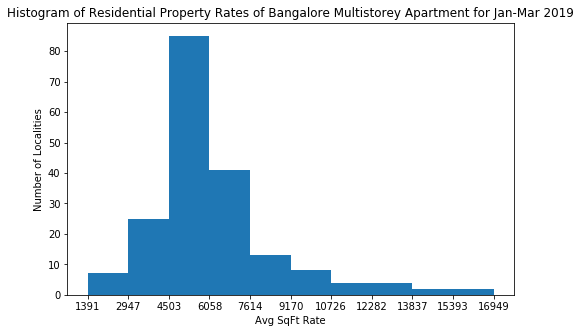

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
count, bin_edges = np.histogram(df_data1['Price'])
df_data1['Price'].plot(kind='hist', figsize=(8,5), xticks=bin_edges)
plt.title("Histogram of Residential Property Rates of Bangalore Multistorey Apartment for Jan-Mar 2019")
plt.ylabel("Number of Localities")
plt.xlabel("Avg SqFt Rate")
plt.show()

##### Lets create a map for Bangalore

In [59]:
address = 'Bangalore, India'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
lati = location.latitude
longi= location.longitude
print('The geograpical coordinate of Bangalore City are {}, {}.'.format(lati, longi))

The geograpical coordinate of Bangalore City are 12.9791198, 77.5912997.


In [74]:
import os 

# create map of Bangalore using latitude and longitude values
map_Bangalore = folium.Map(location=[lati, longi], zoom_start=10)

# add markers to map
for lat, lng, Location, Price in zip(df_data1['Latitude'], df_data1['Longitude'], df_data1['Locality'], df_data1['Price']):
    label = '{}, {}'.format(Location, Price)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Bangalore)  
    
map_Bangalore

#map_Bangalore.save(os.path.join('results', 'Bangalore map with Sqfeet rates.html'))
#map_Bangalore.save('plot_data.html')
# Import the Folium interactive html file
#from IPython.display import HTML
#HTML('<iframe src=plot_data.html width=700 height=450></iframe>')

In [61]:
# download geojson file
#!wget --quiet https://raw.githubusercontent.com/datameet/Municipal_Spatial_Data/master/Bangalore/BBMP.GeoJSON -O Bangalore.json
##!wget --quiet https://raw.githubusercontent.com/openbangalore/bangalore/master/bangalore/GIS/bangalore_pincode.json -O Bangalore.json
#####!wget --quiet http://raw.githubusercontent.com/openbangalore/bangalore/master/bangalore/GIS/BBMP_Wards_2011_region.json -O Bangalore.json
#    https://dataplatform.cloud.ibm.com/projects/06c25a5b-8df2-4749-bfa2-c0b2ed0bc3d1/data-assets/431ed51e-6063-40ea-821e-1026e671f2e7/preview?context=wdp&label=true
!wget --quiet https://raw.githubusercontent.com/Jothi-Nadarajan/Coursera_Capstone/master/document_V4.json -O Bangalore.json
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [80]:
Bangalore_geo = r'Bangalore.json' # geojson file

# create a plain Bangalore map
Cmap_Bangalore = folium.Map(location=[lati, longi], zoom_start=12)
Cmap_Bangalore

#map_Bangalore = folium.Map(location=[lati, longi], zoom_start=10), tiles='Mapbox Bright'

In [81]:
# generate choropleth map using the Avg Price of each Locality in Bangalore
Cmap_Bangalore.choropleth(
    geo_data=Bangalore_geo,
    data=df_data,
    columns=['Locality', 'Price'],
    key_on='feature.properties.WARD_NAME',
    fill_color='YlOrRd',
#    bins=[1, 2, 3, 6],
#    nan_fill_color='purple',
#    nan_fill_opacity=0.4,
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Residential Apartment Price Range in Bangalore'
)

# display map
Cmap_Bangalore

In [82]:
CLIENT_ID = 'UIQ4L5BT3UCIGC5ITLFWV1UM0SNPPCYBO0R55C2NWLQ4T5LF' # your Foursquare ID
CLIENT_SECRET = 'YADN0IBSHTRRSFHIKFHDMQHCEZHNRYTTGZC1TQ4DDUTFZG2Q' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
radius = 500

#### Explore the venues in each locality

In [83]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
#        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [87]:
Bangalore_venues = getNearbyVenues(names=df_data1['Locality'],
                                   latitudes=df_data1['Latitude'],
                                   longitudes=df_data1['Longitude']
                                  )

A Narayanapura
AECS Layout
Adugodi
Ambalipura
Amrutahalli
Amruthalli
Anchepalya
AnjanaPura
Arakere
Ashok Nagar
Attibele
Attiguppe
Atturu
Ayyappa Nagar
BTM Layout
Bagalakunte
Banashankari
Banashankari Stage 2
Banashankari Stage 3
Banashankari stage 6
Banaswadi
Bannerghatta
Bannerghatta Main Road
Basavanagudi
Basaveshwara Nagar
Begur
Begur Road
Bellandur
Bellary Road
Benson Town
Bilekahalli
Binnipete
Bommanahalli
Budigere
Budigere Cross
C V Raman Nagar
Chamrajapet
Chandapura
Chandra Layout
Chickpet
Chikkalasandra
Cooke Town
Dasarahalli
Devanahalli
Doddaballapur Road
Doddakannelli
Doddanekundi
Doddathoguru
Domlur
ECC Road
Ejipura
Electronic City
Electronic City Phase 2
Electronics City Phase 1
Gandhinagar
Gottigere
Gubbalala
Gunjur
HBR Layout
HRBR Layout
HSR Layout
HSR Layout Sector 2
Halasuru
Haralur Road
Harlur
Hebbal
Hegde Nagar
Hegganahalli
Hennur
Hennur Bagalur Road
Hennur Main Road
Herohalli
Hesaraghatta Main Road
Hongasandra
Hoodi
Hoodi Circle
Horamavu
Horamavu Agara
Hosa Road
Hosa

In [88]:
Bangalore_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,A Narayanapura,12.993194,77.670377,McDonald's,12.993667,77.666576,Burger Joint
1,A Narayanapura,12.993194,77.670377,Domino's Pizza,12.995288,77.666318,Pizza Place
2,A Narayanapura,12.993194,77.670377,Nilgiris,12.993644,77.667203,Department Store
3,A Narayanapura,12.993194,77.670377,MedPlus,12.993617,77.666853,Pharmacy
4,A Narayanapura,12.993194,77.670377,Hot Chips,12.993521,77.666746,Snack Place


In [90]:
Bangalore_venues.shape

(1610, 7)

In [91]:
Bangalore_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
A Narayanapura,8,8,8,8,8,8
AECS Layout,12,12,12,12,12,12
Adugodi,5,5,5,5,5,5
Ambalipura,15,15,15,15,15,15
Amrutahalli,1,1,1,1,1,1
Amruthalli,1,1,1,1,1,1
AnjanaPura,1,1,1,1,1,1
Ashok Nagar,87,87,87,87,87,87
Attiguppe,16,16,16,16,16,16


##### Let's find out how many unique categories can be curated from all the returned venues

In [92]:
print('There are {} uniques categories.'.format(len(Bangalore_venues['Venue Category'].unique())))

There are 196 uniques categories.


In [101]:
Bangalore_venues.head()
# Lets create a chart to show the Number of venues in each Locality/Neighbourhood
#Bangalore_venues.set_index('Neighborhood',inplace=True)
df_bar = Bangalore_venues[['Neighborhood','Venue Category']].copy()
#df_data1.plot(kind='bar')


KeyError: "['Neighborhood'] not in index"